# Decision Tree

In [421]:
import math
import warnings
from datetime import datetime
start=datetime.now()
from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
from sklearn import tree,model_selection
from sklearn.grid_search import GridSearchCV
# A convenience for displaying visualizations.
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [422]:
#Creating dataframe for the data
data = pd.read_csv('C:/Personal/09142640/Downloads/Car_sales_U.csv')
data.columns.values[3]='Year_Resale_Value'
data_req=data.loc[:,["Sales_in_thousands","Year_Resale_Value","Price_in_thousands","Engine_size","Horsepower","Wheelbase","Width","Length","Curb_weight","Fuel_capacity","Fuel_efficiency","Power_perf_factor"]]
data_na=data_req.fillna(0)
#data_req=data_na.astype('float')
#data_na.dtype()

In [423]:
#X and Y variables -X being the features and Y being the output variable
Y = data_na[['Sales_in_thousands']]
X = data_na.drop(columns='Sales_in_thousands')
X.head(5)


,Year_Resale_Value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.360,21.500,1.800,140,101.200,67.300,172.400,2.639,13.200,28.000,58.280
1,19.875,28.400,3.200,225,108.100,70.300,192.900,3.517,17.200,25.000,91.371
2,18.225,0.000,3.200,225,106.900,70.600,192.000,3.470,17.200,26.000,0.000
3,29.725,42.000,3.500,210,114.600,71.400,196.600,3.850,18.000,22.000,91.390
4,22.255,23.990,1.800,150,102.600,68.200,178.000,2.998,16.400,27.000,62.778


In [478]:
#creating variables for training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [479]:
# Creating decision tree using the training data
decision_tree = tree.DecisionTreeRegressor()
    #criterion='mse',
    #max_features='sqrt',
    #max_depth=4

#decision_tree.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
#import pydotplus
#import graphviz
# Render our tree.
#dot_data = tree.export_graphviz(
 #   decision_tree, out_file=None,
  #  feature_names=X.columns
#3)graph = pydotplus.graph_from_dot_data(dot_data)
#Image(graph.create_png())

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [480]:
param_grid = {
    'max_depth': [2,3,4],
    'max_features': [11],
    'max_features' : ['auto', 'sqrt']
    }
grid_class= model_selection.GridSearchCV(estimator = decision_tree, param_grid = param_grid,cv = 3)
#Using Grid search  for finding the best set of parameters
#dt_grid={'max_depth':[1,2,3],'criterion':["friedman_mse"]}
#grid_class=model_selection.GridSearchCV(decision_tree,dt_grid,refit=True,cv=10)
grid_class.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4], 'max_features': ['auto', 'sqrt']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [482]:
#Displaying the parameters using Grid search
results = grid_class.cv_results_
#print(results.get('params'))
#print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print((grid_class.best_params_))
print((grid_class.best_score_))
final_model = grid_class.best_estimator_
print(final_model)

[0.46348814 0.47479648 0.52974347 0.51467225 0.65304916 0.56575658]
{'max_depth': 2, 'max_features': 'sqrt'}
-0.04141555263606314
DecisionTreeRegressor(criterion='mse', max_depth=2, max_features='sqrt',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')


C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [476]:
#Using paramters provided by  Grid search above to build the decision tree
#decision_tree1 = tree.DecisionTreeRegressor(criterion='friedman_mse', max_depth=1,
 #          max_features=None, max_leaf_nodes=None,
 #          min_impurity_decrease=0.0, min_impurity_split=None,
 #          min_samples_leaf=1, min_samples_split=2,
 #          min_weight_fraction_leaf=0.0, presort=False, random_state=0,
 #          splitter='best')



decision_tree.fit(X_train, y_train)
#decision_tree1.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [477]:
#holdout and cross validation for the decision tree
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(decision_tree.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(decision_tree.fit(X, Y).score(X, Y)))

With 20% Holdout: -1.012714612103784
Testing on Sample: 1.0


In [386]:
#Cross Vaidation to get the accuracy
#from sklearn.model_selection import cross_val_score
#cross_val_score(decision_tree, X, Y, cv=10)

array([ -1.42441453,  -3.31666265,  -1.76389495,  -0.08771907,
        -1.08535554, -11.24115676,  -1.41997643,  -2.39572885,
        -1.31228331, -12.49106067])

In [388]:
#Using PCA

features_pca =data.loc[:,["Year_Resale_Value","Price_in_thousands","Engine_size","Horsepower","Wheelbase","Width","Length","Curb_weight","Fuel_capacity","Fuel_efficiency","Power_perf_factor"]].fillna(0)

In [389]:
# The NumPy covariance function assumes that variables are reprensented by rows, not columns, so we transpose X.
Xt = X_train.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.55230069e+02  1.69084141e+02  6.93890270e+00  5.41595333e+02
  -2.81618952e+00  1.08179542e+01  4.12238815e+00  2.70800378e+00
   1.50687456e+01 -2.15600082e+01  2.58863635e+02]
 [ 1.69084141e+02  2.35215206e+02  1.06732539e+01  7.61100975e+02
   1.17682820e+01  1.96744071e+01  3.26623946e+01  4.78370724e+00
   2.61019944e+01 -3.37693171e+01  3.80534118e+02]
 [ 6.93890270e+00  1.06732539e+01  1.23982691e+00  5.71191975e+01
   3.98794650e+00  2.86524521e+00  8.09146604e+00  5.13040231e-01
   3.09208760e+00 -3.59845266e+00  2.45756373e+01]
 [ 5.41595333e+02  7.61100975e+02  5.71191975e+01  3.67792552e+03
   1.34242460e+02  1.27258982e+02  3.37987071e+02  2.20145240e+01
   1.23887831e+02 -1.71002360e+02  1.58444117e+03]
 [-2.81618952e+00  1.17682820e+01  3.98794650e+00  1.34242460e+02
   6.44813605e+01  1.96104904e+01  9.35449646e+01  3.24603392e+00
   2.16528947e+01 -1.92023931e+01  5.34641308e+01]
 [ 1.08179542e+01  1.96744071e+01  2.86524521e+00  1.27258982e+02

In [391]:

X_pca = StandardScaler().fit_transform(features_pca)
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

In [392]:
#PCA to get the 2 best features
sklearn_pca = PCA(n_components=11)
x_sklearn = sklearn_pca.fit_transform(X_pca)
#regr.fit(x_sklearn, Y)
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.5798994  0.2090275  0.06302122 0.04172858 0.03014566 0.02441164
 0.01946664 0.01198268 0.01101651 0.00693254 0.00236763]


By using PCA, we can see the first 2 features are closely correlated to the output variable so we will keep them

Now we will use these models after doing PCA-

1.GridsearchCV

2.Holdout and cross validation

3.Classification report

In [393]:
Y_pca = data_na[['Sales_in_thousands']]
X_pca_fea = data_na[["Year_Resale_Value","Price_in_thousands"]]


In [394]:
#using training and test data
from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_fea, Y_pca, random_state=1)

In [395]:
decision_tree_pca = tree.DecisionTreeRegressor( max_features=2,
    max_depth=4
)

decision_tree_pca.fit(X_train_pca, y_train_pca)
import pydotplus
import graphviz
# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree_pca, out_file=None,
    feature_names=X_pca_fea.columns
)



In [396]:
#Using Grid search  for finding the best set of parameters
dt_grid_pca={'max_depth':[3,4,5],'criterion':['mse']}
grid_class_pca=model_selection.GridSearchCV(decision_tree_pca,dt_grid_pca,refit=True,return_train_score=True)
grid_class_pca.fit(X_train_pca, y_train_pca)
#Displaying the parameters using Grid search
results_pca = grid_class_pca.cv_results_
print(results_pca.get('params'))
print(results_pca.get('mean_test_score'))
print(results_pca.get('mean_train_score'))
print(grid_class_pca.best_params_)
print(grid_class_pca.best_score_)
final_model_pca = grid_class_pca.best_estimator_
print(final_model_pca)

[{'criterion': 'mse', 'max_depth': 3}, {'criterion': 'mse', 'max_depth': 4}, {'criterion': 'mse', 'max_depth': 5}]
[-0.23415195 -0.49293474 -0.44957207]
[0.52229394 0.63762325 0.73119439]
{'criterion': 'mse', 'max_depth': 3}
-0.2341519503920075
DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=2,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')


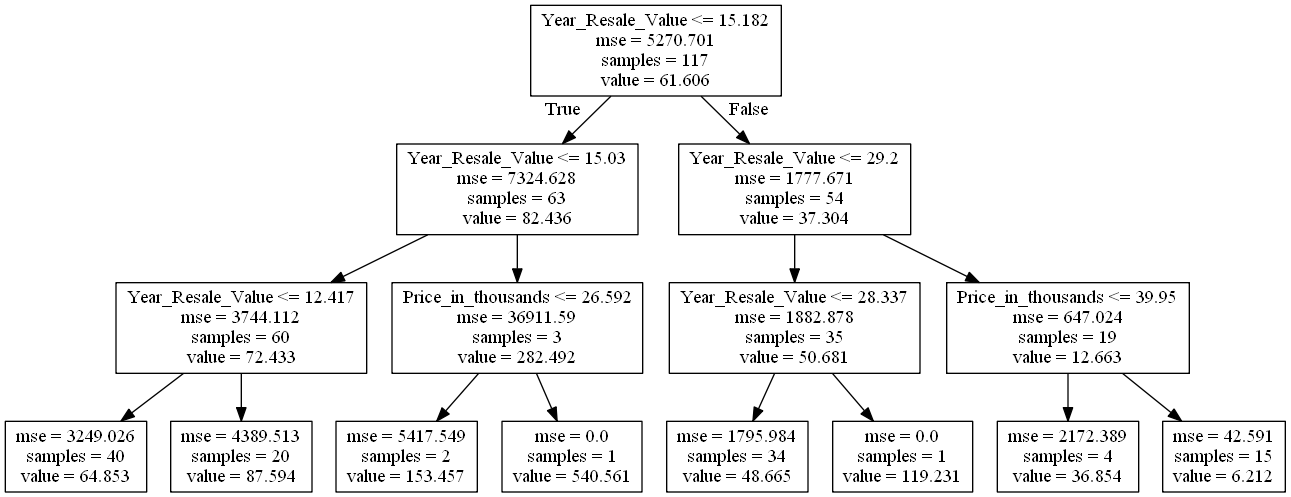

In [397]:
#Using parameters provided by Grid search cv and building the tree
decision_tree_pca = tree.DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=2,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

#decision_tree.fit(X_train, y_train)
decision_tree_pca.fit(X_train_pca, y_train_pca)
import pydotplus
import graphviz
# Render our tree.
dot_data_pca = tree.export_graphviz(
    decision_tree_pca, out_file=None,
    feature_names=X_pca_fea.columns
)
graph = pydotplus.graph_from_dot_data(dot_data_pca)
Image(graph.create_png())

In [398]:
#holdout and cross validation for the decision tree after PCA
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X_pca_fea, Y_pca, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(decision_tree_pca.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(decision_tree_pca.fit(X_pca_fea, Y_pca).score(X_pca_fea, Y_pca)))

With 20% Holdout: -1.6067669707155274
Testing on Sample: 0.32555023875660505


In [399]:
#Cross Vaidation
from sklearn.model_selection import cross_val_score
cross_val_score(decision_tree_pca, X_pca_fea, Y_pca, cv=10)

array([ -1.79399005,  -0.25755226,   0.41916768,  -0.70659895,
        -0.56678906,  -3.02050205, -17.43841413,  -3.46565918,
         0.09880733,  -1.62141155])

By using SelectKbest, we can see the first 2 features are closely correlated to the output variable so we will keep them

Now we will use these models after doing selectkbest-

1.GridsearchCV

2.Holdout and cross validation

3.Classification report

In [400]:
Y = data_na[['Sales_in_thousands']]
X = data_na.drop(columns='Sales_in_thousands')
from sklearn.model_selection import train_test_split
import numpy
#Y=Y.reshape(-1,1)
#X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)
#sel_kbest = SelectKBest(f_classif, k=2).fit(X_train, y_train)


In [483]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)
names = ["Year_Resale_Value","Price_in_thousands","Engine_size","Horsepower","Wheelbase","Width","Length","Curb_weight","Fuel_capacity","Fuel_efficiency","Power_perf_factor"]
for n in range(0, len(names)):
    test = SelectKBest(score_func=f_classif, k=2)
    fit = test.fit(X_train, y_train)
    print(names[n], fit.scores_[n])

Year_Resale_Value nan
Price_in_thousands nan
Engine_size nan
Horsepower nan
Wheelbase nan
Width nan
Length nan
Curb_weight nan
Fuel_capacity nan
Fuel_efficiency nan
Power_perf_factor nan


C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

Using selectkbest , we have 2 best features-"Year_Resale_Value","Horsepower"

In [46]:
Y_skb = data_na[['Sales_in_thousands']].astype('int')
X_skb = data_na[["Year_Resale_Value","Horsepower"]].astype('int')

In [47]:
#using training and test data
from sklearn.model_selection import train_test_split

X_train_skb, X_test_skb, y_train_skb, y_test_skb = train_test_split(X_skb, Y_skb, random_state=1)

In [48]:
# Show results
#print('Original number of features:', X_train.shape)
#print('Reduced number of features:', X_kbest.shape)
#print('Reduced number of features:', Y.shape)
decision_tree_skb = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=2,
    max_depth=4
)

decision_tree_skb.fit(X_train_skb, y_train_skb)
import pydotplus
import graphviz

In [49]:
#Using Grid search  for finding the best set of parameters
dt_grid_skb={'max_depth':[3,4,5],'criterion':['gini','entropy']}
grid_class_skb=model_selection.GridSearchCV(decision_tree_skb,dt_grid_skb,refit=True,cv=2,return_train_score=True)
grid_class_skb.fit(X_train_skb, y_train_skb)

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=2, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [50]:
#Displaying the parameters using Grid search
results = grid_class_skb.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print(grid_class.best_params_)
print(grid_class.best_score_)
final_model = grid_class_skb.best_estimator_
print(final_model)

[{'criterion': 'gini', 'max_depth': 3}, {'criterion': 'gini', 'max_depth': 4}, {'criterion': 'gini', 'max_depth': 5}, {'criterion': 'entropy', 'max_depth': 3}, {'criterion': 'entropy', 'max_depth': 4}, {'criterion': 'entropy', 'max_depth': 5}]
[0.05128205 0.05982906 0.03418803 0.05128205 0.05128205 0.05982906]
[0.20533088 0.27573529 0.36176471 0.24246324 0.38915441 0.64926471]
{'criterion': 'gini', 'max_depth': 3}
0.05128205128205128
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


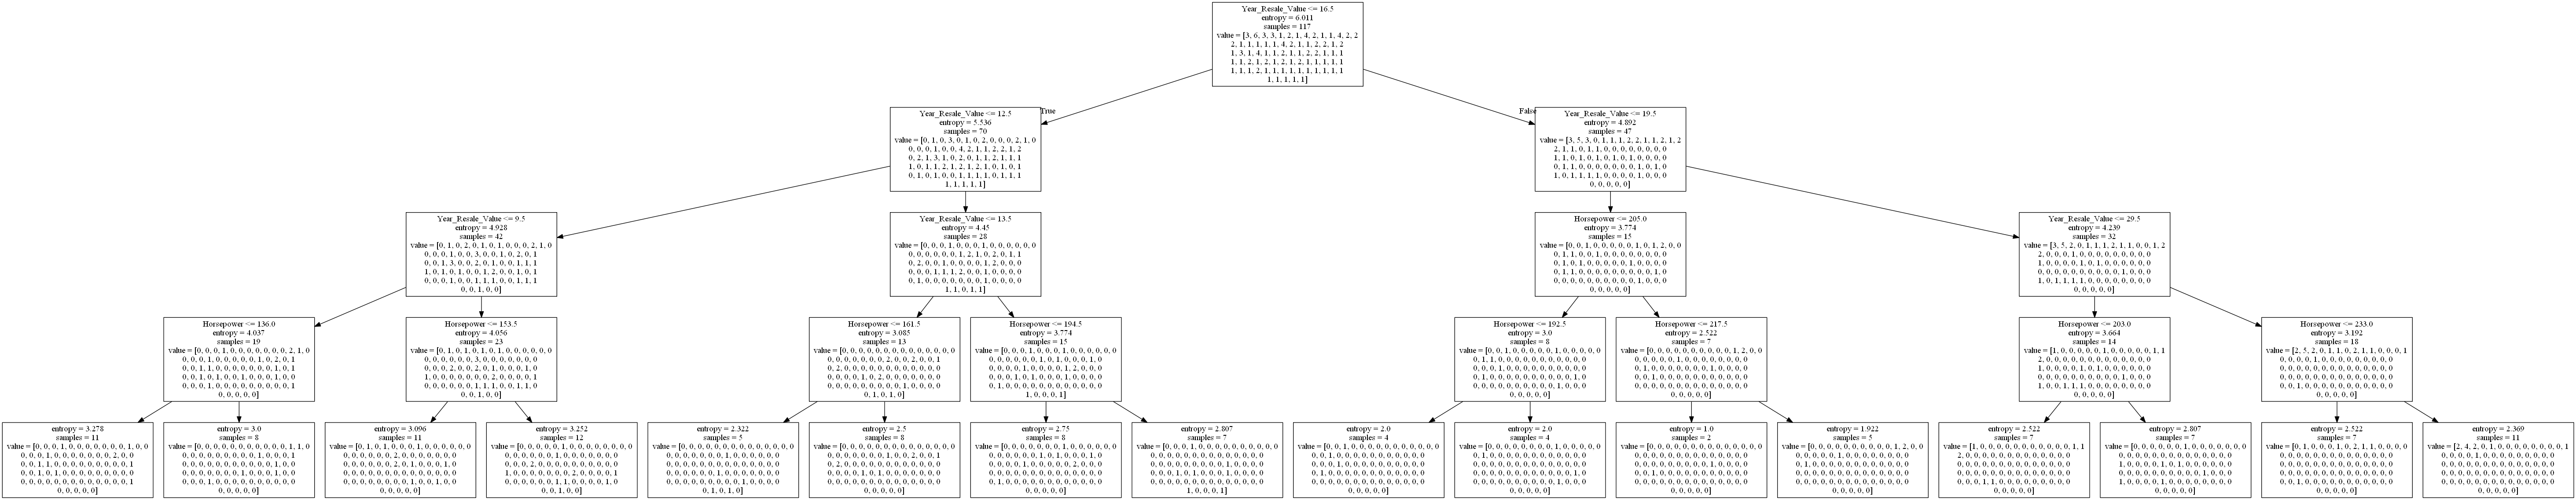

In [51]:
#Using parameters provided by Grid search cv and building the tree
decision_tree_skb = tree.DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')



#decision_tree.fit(X_train, y_train)
decision_tree_skb.fit(X_train_skb, y_train_skb)
import pydotplus
import graphviz
# Render our tree.
dot_data_skb = tree.export_graphviz(
    decision_tree_skb, out_file=None,
    feature_names=X_skb.columns
)
graph = pydotplus.graph_from_dot_data(dot_data_skb)
Image(graph.create_png())

In [52]:
#holdout and cross validation for the decision tree after select kbest
#from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
#X_train, X_test, y_train, y_test = train_test_split(X_skb, Y_skb, test_size=0.4, random_state=20)
print('With 40% Holdout: ' + str(decision_tree_skb.fit(X_train_skb, y_train_skb).score(X_test_skb, y_test_skb)))
print('Testing on Sample: ' + str(decision_tree_skb.fit(X_skb, Y_skb).score(X_skb, Y_skb)))

With 40% Holdout: 0.02564102564102564
Testing on Sample: 0.19230769230769232


In [53]:
#Cross Vaidation
from sklearn.model_selection import cross_val_score
cross_val_score(decision_tree_skb, X_skb, Y_skb, cv=6)

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=6.
  % (min_groups, self.n_splits)), Warning)


array([0.02272727, 0.        , 0.        , 0.11111111, 0.33333333,
       1.        ])

In [54]:
#Classification Report
ypred = decision_tree_skb.predict(X_test_skb)
from sklearn import metrics
print(metrics.classification_report(ypred, y_test_skb))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         5
          1       0.00      0.00      0.00         2
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       1.00      0.33      0.50         3
          8       0.00      0.00      0.00         0
          9       1.00      0.33      0.50         3
         12       0.00      0.00      0.00         0
         13       0.00      0.00      0.00         0
         16       0.00      0.00      0.00         0
         18       0.00      0.00      0.00         6
         20       1.00      0.25      0.40         4
         21       0.00      0.00      0.00         1
         24       0.00      0.00      0.00         2
         25       0.00      0.00      0.00         0
         26       0.00      0.00      0.00         0
         27       0.00      0.00      0.00         0
         28       0.00      0.00      0.00   

C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\09142640\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [55]:
print(datetime.now()-start)

0:03:11.895000


# Conclusion:

Feature Selection model PCA looks to be more accurate with 70% of accuracy when using classification report where as Selectkbest is only 47%.The total time took to execute all the steps is 7 minutes